<a href="https://colab.research.google.com/github/AdvaitNaik/VIOLENT-INDIVIDUALS-IDENTIFICATION/blob/master/VIOLENT_INDIVIDUALS_IDENTIFICATION_FACE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRIVE MOUNTING**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**IMPORTING LIBRARIES**

In [0]:
%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from random import shuffle


import sys
import h5py

print ("Done!")

Using TensorFlow backend.


Done!


**LOAD DATA**

In [0]:
in_dir = "data"

in_dir = '/content/drive/My Drive/Colab Notebooks/VIOLENCE_DATASET_2'

print ("Done!")

print(in_dir)

Done!
/content/drive/My Drive/Colab Notebooks/VIOLENCE_DATASET_2


**DATA AUGMENTATION**




In [0]:
# Frame size  
img_size = 224

img_size_touple = (img_size, img_size)

# Number of channels (RGB)
num_channels = 3

# Flat frame size
img_size_flat = img_size * img_size * num_channels

# Number of classes for classification (Violence-No Violence)
num_classes = 2

# Number of files to train
_num_files_train = 1

# Number of frames per video
_images_per_file = 20

# Number of frames per training set
_num_images_train = _num_files_train * _images_per_file

# Video extension
video_exts = ".mp4"

print ("Done!")

Done!


In [0]:
def get_frames(current_dir, file_name):
    
    in_file = os.path.join(current_dir, file_name)
    
    images = []
    
    vidcap = cv2.VideoCapture(in_file)
    
    success,image = vidcap.read()
        
    count = 0

    while count<_images_per_file:
                
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        res = cv2.resize(RGB_img, dsize=(img_size, img_size),
                                 interpolation=cv2.INTER_CUBIC)
    
        images.append(res)
    
        success,image = vidcap.read()
    
        count += 1
        
    resul = np.array(images)
    
    resul = (resul / 255.).astype(np.float16)
        
    return resul

print ("Done!")

Done!


In [0]:
def video_names(in_dir):
    
    # list containing video names
    names1 = []

    for current_dir, dir_names,file_names in os.walk(in_dir):
        
        for file_name1 in file_names:
          
           names1.append(file_name1)

           shuffle(names1)
                  
    return tuple(names1)

print ("Done!")

Done!


In [0]:
# First get the names and labels of the whole videos
names1 = video_names(in_dir)

print ("Done!")

Done!


In [0]:
print(names1)
print(len(names1))

('NV_124.mp4', 'NV_264.mp4', 'NV_612.mp4', 'NV_96.mp4', 'V_89.mp4', 'NV_904.avi', 'V_26.mp4', 'NV_536.mp4', 'NV_451.mp4', 'NV_31.mp4', 'NV_923.mp4', 'NV_222.mp4', 'V_524.mp4', 'NV_563.mp4', 'V_20.mp4', 'V_38.mp4', 'V_641.mp4', 'NV_523.mp4', 'NV_880.avi', 'NV_255.mp4', 'V_762.mp4', 'V_769.mp4', 'NV_743.mp4', 'V_5.mp4', 'NV_355.mp4', 'V_517.mp4', 'V_719.mp4', 'V_781.mp4', 'NV_688.mp4', 'NV_723.mp4', 'NV_841.mp4', 'V_604.mp4', 'V_770.mp4', 'V_206.mp4', 'NV_240.mp4', 'NV_5.mp4', 'NV_76.mp4', 'V_207.mp4', 'NV_606.mp4', 'NV_172.mp4', 'V_366.mp4', 'V_710.mp4', 'V_826.mp4', 'V_724.mp4', 'V_587.mp4', 'V_118.mp4', 'NV_129.mp4', 'V_458.mp4', 'NV_543.mp4', 'V_585.mp4', 'V_695.mp4', 'V_93.mp4', 'NV_384.mp4', 'V_970.mp4', 'NV_586.mp4', 'V_4.mp4', 'V_299.mp4', 'V_674.mp4', 'V_888.mp4', 'NV_224.mp4', 'NV_453.mp4', 'V_894.mp4', 'NV_727.mp4', 'V_554.mp4', 'NV_873.avi', 'V_87.mp4', 'NV_696.mp4', 'V_582.mp4', 'V_965.mp4', 'V_956.mp4', 'NV_914.mp4', 'NV_457.mp4', 'NV_806.mp4', 'NV_818.mp4', 'NV_874.avi', '

In [0]:
names1[9]

'NV_31.mp4'

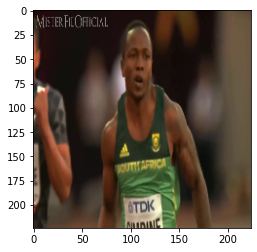

In [0]:
frames = get_frames(in_dir, names1[9])
visible_frame = (frames*255).astype('uint8')
plt.imshow(visible_frame[7])

In [0]:
import cv2
import numpy as np
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [0]:
def face_detector(frame):
    # Convert image to grayscale
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    img_pixels=[]
   #print(faces) #locations of detected faces

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image

        detected_face = frame[int(y):int(y+h), int(x):int(x+w)] #crop detected face

        return detected_face

In [0]:
current_dir=in_dir
video_no=names1[9]
print(video_no)
file_name=video_no

NV_31.mp4


In [0]:
in_file = os.path.join(current_dir, file_name)
cap = cv2.VideoCapture(in_file)
ret, frame = cap.read()
print(ret)
print(frame)
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
print(gray)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image

    detected_face = frame[int(y):int(y+h), int(x):int(x+w)] #crop detected face

print(detected_face)



True
[[[ 15  18  31]
  [ 15  18  31]
  [ 13  16  29]
  ...
  [ 41  58  74]
  [ 41  58  74]
  [ 41  58  74]]

 [[ 15  18  31]
  [ 15  18  31]
  [ 13  16  29]
  ...
  [ 43  60  76]
  [ 43  60  76]
  [ 43  60  76]]

 [[ 16  19  32]
  [ 16  19  32]
  [ 15  18  31]
  ...
  [ 43  60  76]
  [ 43  60  76]
  [ 43  60  76]]

 ...

 [[ 21  53 173]
  [ 18  50 170]
  [ 20  45 171]
  ...
  [ 68  91 110]
  [ 68  91 110]
  [ 68  91 110]]

 [[ 21  54 172]
  [ 18  51 169]
  [ 20  46 170]
  ...
  [ 66  89 108]
  [ 66  89 108]
  [ 66  89 108]]

 [[ 21  54 172]
  [ 18  51 169]
  [ 20  46 170]
  ...
  [ 64  87 106]
  [ 64  87 106]
  [ 64  87 106]]]
[[22 22 20 ... 61 61 61]
 [22 22 20 ... 63 63 63]
 [23 23 22 ... 63 63 63]
 ...
 [85 82 80 ... 94 94 94]
 [86 83 80 ... 92 92 92]
 [86 83 80 ... 90 90 90]]
[[536  67 191 191]]
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]

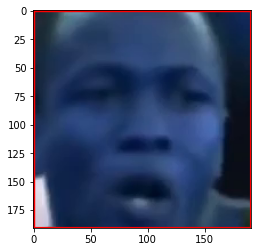

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(detected_face)

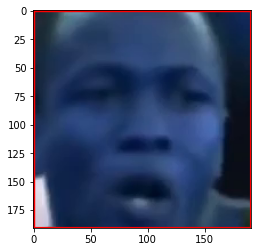

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

in_file = os.path.join(current_dir, file_name)
cap = cv2.VideoCapture(in_file)

ret, frame = cap.read()
img1=face_detector(frame)

cap.release()
cv2.destroyAllWindows()

plt.imshow(img1)